In [1]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt

from keras.datasets import imdb
# https://www.imdb.com/
(X, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [2]:
def vect(seq, dim=10000):
    x=np.zeros((len(seq),dim))
    for n, i in enumerate(seq):
        x[n, i] = 1
    return x

X_train=vect(X)
X_test=vect(X_test)

In [3]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [4]:
net = models.Sequential()
net.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(1, activation='sigmoid'))
net.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

val = net.fit(partial_X_train, partial_y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/5
118/118 [==============================] - 2s 14ms/step - loss: 0.5982 - acc: 0.6667 - val_loss: 0.4160 - val_acc: 0.8544
Epoch 2/5
118/118 [==============================] - 1s 12ms/step - loss: 0.3896 - acc: 0.8487 - val_loss: 0.2850 - val_acc: 0.8875
Epoch 3/5
118/118 [==============================] - 1s 12ms/step - loss: 0.2886 - acc: 0.8980 - val_loss: 0.2706 - val_acc: 0.8893
Epoch 4/5
118/118 [==============================] - 1s 12ms/step - loss: 0.2251 - acc: 0.9220 - val_loss: 0.2796 - val_acc: 0.8866
Epoch 5/5
118/118 [==============================] - 1s 12ms/step - loss: 0.1798 - acc: 0.9353 - val_loss: 0.3037 - val_acc: 0.8864


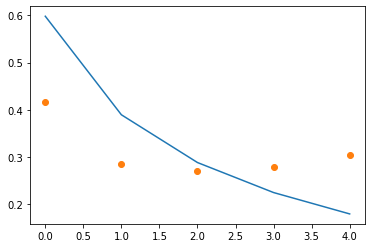

In [5]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']
x = np.arange(0,len(loss))

plt.plot(x,loss,'-')
plt.plot(x,val_loss,'o')

In [6]:
test_loss, test_acc = net.evaluate(X_test,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3257 - acc: 0.8786


In [35]:
from keras.preprocessing import sequence

max_words=10000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

maxlen = 100 
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [75]:
rnn = models.Sequential()
rnn.add(layers.Embedding(max_words, 16)) 
rnn.add(layers.SimpleRNN(32,activation = 'relu',return_sequences = True)) 
rnn.add(layers.Dropout(0.2))
rnn.add(layers.Dense(1,activation = 'sigmoid'))
rnn.compile(optimizer = 'nadam',loss = 'binary_crossentropy',metrics = ['acc'])

In [71]:
rnn.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, None, 16)          160000    
_________________________________________________________________
simple_rnn_21 (SimpleRNN)    (None, None, 32)          1568      
_________________________________________________________________
dropout_20 (Dropout)         (None, None, 32)          0         
_________________________________________________________________
dense_19 (Dense)             (None, None, 1)           33        
Total params: 161,601
Trainable params: 161,601
Non-trainable params: 0
_________________________________________________________________


In [78]:
history = rnn.fit(X_train,y_train,epochs = 30 ,batch_size = 128,verbose=1,validation_split = 0.2)

Epoch 1/30
157/157 [==============================] - 5s 34ms/step - loss: 0.2921 - acc: 0.8674 - val_loss: 0.8994 - val_acc: 0.7102
Epoch 2/30
157/157 [==============================] - 5s 34ms/step - loss: 0.2456 - acc: 0.8865 - val_loss: 1.0251 - val_acc: 0.7076
Epoch 3/30
157/157 [==============================] - 5s 34ms/step - loss: 0.2273 - acc: 0.8941 - val_loss: 0.9600 - val_acc: 0.7101
Epoch 4/30
157/157 [==============================] - 5s 34ms/step - loss: 0.2276 - acc: 0.8950 - val_loss: 0.9874 - val_acc: 0.7079
Epoch 5/30
157/157 [==============================] - 5s 34ms/step - loss: 0.2204 - acc: 0.8974 - val_loss: 2.3092 - val_acc: 0.6622
Epoch 6/30
157/157 [==============================] - 5s 34ms/step - loss: 0.2489 - acc: 0.8893 - val_loss: 0.9438 - val_acc: 0.7096
Epoch 7/30
157/157 [==============================] - 5s 35ms/step - loss: 0.2154 - acc: 0.8982 - val_loss: 1.2234 - val_acc: 0.7035
Epoch 8/30
157/157 [==============================] - 5s 34ms/step - 

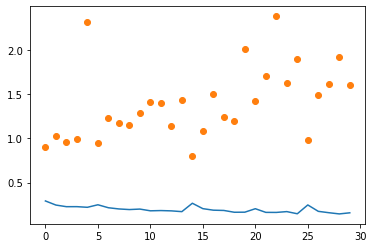

In [79]:
loss=history.history['loss']
val=history.history['val_loss']
plt.plot(loss)
plt.plot(val,'o')

In [81]:
rnn_test_loss, rnn_test_acc = rnn.evaluate(X_test,y_test)

782/782 [==============================] - 5s 6ms/step - loss: 1.6269 - acc: 0.6729


In [82]:
print(rnn_test_loss,rnn_test_acc)

1.6268982887268066 0.672876238822937
